In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pest_titles.csv to pest_titles.csv
User uploaded file "pest_titles.csv" with length 13787 bytes


In [0]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['pest_titles.csv']))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
sentences=df2['Titles']
sentences=sentences.tolist()

In [17]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
#vectorizer.vocabulary_


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
vectorizer.transform(sentences).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
labels=df2['Tag'].tolist()

In [0]:
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, label_train, label_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<114x821 sparse matrix of type '<class 'numpy.int64'>'
	with 1327 stored elements in Compressed Sparse Row format>

In [29]:
#Trying out logistic Regression:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, label_train)
score = classifier.score(X_test, label_test)
print(score)

0.9230769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
>>> from keras.models import Sequential
>>> from keras import layers

Using TensorFlow backend.


In [33]:
>>> input_dim = X_train.shape[1]  # Number of features
print(input_dim)

821


In [34]:
model=Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                8220      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 8,231
Trainable params: 8,231
Non-trainable params: 0
_________________________________________________________________


In [49]:
>>> history = model.fit(X_train, label_train,
...                     epochs=10,
...                     verbose=True,
...                     validation_data=(X_test, label_test),
...                     batch_size=10)

Train on 114 samples, validate on 39 samples
Epoch 1/10
114/114 [==============================] - 0s 449us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3898 - val_acc: 0.9231
Epoch 2/10
114/114 [==============================] - 0s 311us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3900 - val_acc: 0.9231
Epoch 3/10
114/114 [==============================] - 0s 307us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3904 - val_acc: 0.9231
Epoch 4/10
114/114 [==============================] - 0s 335us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.3909 - val_acc: 0.9231
Epoch 5/10
114/114 [==============================] - 0s 284us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3911 - val_acc: 0.9231
Epoch 6/10
114/114 [==============================] - 0s 316us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3915 - val_acc: 0.9231
Epoch 7/10
114/114 [==============================] - 0s 298us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3917 - val_acc: 0.9231
Epoch 8/10
114/11

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

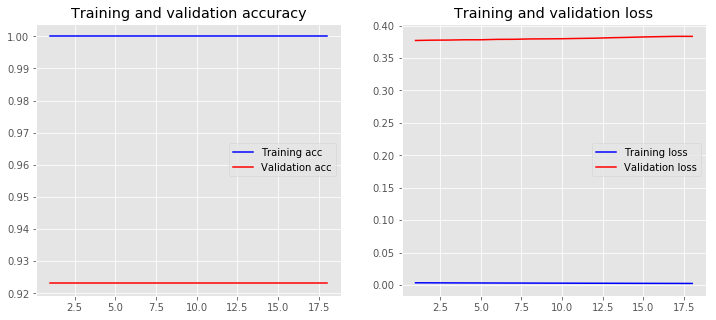

In [46]:
plot_history(history)

array([[3.05650532e-02],
       [2.61209965e-01],
       [2.01261014e-01],
       [1.30260110e-01],
       [4.34807241e-02],
       [3.47248614e-02],
       [2.86772370e-01],
       [1.07222497e-02],
       [9.24886167e-01],
       [6.77435100e-02],
       [5.49024940e-02],
       [4.93118227e-01],
       [3.25918198e-04],
       [5.75280786e-02],
       [5.31575084e-03],
       [3.98548990e-01],
       [1.33177400e-01],
       [1.52093321e-01],
       [2.20978260e-03],
       [7.83017278e-02],
       [1.41979039e-01],
       [3.55726212e-01],
       [8.28508735e-02],
       [6.09391928e-03],
       [8.34725201e-02],
       [4.02808189e-01],
       [3.97208631e-02],
       [1.02682084e-01],
       [7.80103505e-02],
       [2.05529898e-01],
       [2.54213810e-04],
       [1.07411683e-01],
       [4.56386536e-01],
       [1.15867309e-01],
       [9.97667491e-01],
       [9.79768097e-01],
       [1.76919270e-02],
       [1.49828598e-01],
       [3.78025621e-01]], dtype=float32)

In [0]:
#wordembeddings:
>>> from keras.preprocessing.text import Tokenizer

>>> tokenizer = Tokenizer(num_words=200)
>>> tokenizer.fit_on_texts(sentences_train)

In [0]:
>>> X_train = tokenizer.texts_to_sequences(sentences_train)
>>> X_test = tokenizer.texts_to_sequences(sentences_test)

In [0]:
>>> vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


In [53]:
>>> print(sentences_train[2])
>>> print(X_train[2])

Desert locusts could offer dietary and health benefits - SciDev.Net
[92, 25, 26, 93, 94, 6, 44, 45, 95, 46]


In [0]:
>>> from keras.preprocessing.sequence import pad_sequences


In [0]:
>>> maxlen = 100
>>> X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
>>> X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [62]:
from keras.models import Sequential
from keras import layers

embedding_dim = 256

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 256)          214272    
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                256010    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 470,293
Trainable params: 470,293
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=5)

Train on 114 samples, validate on 39 samples
Epoch 1/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5844 - acc: 0.7456 - val_loss: 0.3533 - val_acc: 0.8974
Epoch 2/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5699 - acc: 0.7456 - val_loss: 0.4146 - val_acc: 0.8974
Epoch 3/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5804 - acc: 0.7456 - val_loss: 0.3815 - val_acc: 0.8974
Epoch 4/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5746 - acc: 0.7456 - val_loss: 0.4686 - val_acc: 0.8974
Epoch 5/20
114/114 [==============================] - 0s 2ms/step - loss: 0.6001 - acc: 0.7456 - val_loss: 0.4822 - val_acc: 0.8974
Epoch 6/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5885 - acc: 0.7456 - val_loss: 0.3762 - val_acc: 0.8974
Epoch 7/20
114/114 [==============================] - 0s 1ms/step - loss: 0.5785 - acc: 0.7456 - val_loss: 0.3823 - val_acc: 0.8974
Epoch 8/20
114/114 [===========